In [1]:
import pandas as pd
import numpy as np
import os
import joblib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
AND = {'x1':[0,0,1,1],
      'x2':[0,1,0,1],
      'y':[0,0,0,1]}
dfand = pd.DataFrame(AND)
dfand

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [257]:
class perceptron:
    def __init__(self,lr,epochs):
        self.lr = lr
        self.epochs = epochs
                
    def fit(self,x,y):
        self.x = x
        self.y = y
        print('------inputs---------')
        print(self.x)
        #x_with_bias = np.concatenate([self.x,-np.ones((self.x.shape[0],1))],axis=1)
        #x_with_bias = pd.concat([self.x,pd.Series(-np.ones(self.x.shape[0]))],axis=1)
        x_with_bias = pd.concat([self.x,pd.Series(-np.ones(len(self.x)))],axis=1)
        print('------x_with_bias---------')  
        print(x_with_bias)
        self.weights = np.random.randn(x_with_bias.shape[1])
        print('------weights---------')
        print(self.weights)
        for e in range(self.epochs):
            z = np.dot(x_with_bias,self.weights)
            y_pred = np.where(z>0,1,0)
            print('------y_pred---------')   
            print(y_pred)
            self.y_error = self.y - y_pred
            print('------y_error---------')
            print(self.y_error)
            print('------x_with_bias.T---------Transforming to match the error matrix since column of first matrix to match \
the row of second matrix')
            if min(self.y_error) == 0 and max(self.y_error) == 0 :
                break;
            print(x_with_bias.T)            
            self.weights = self.weights + self.lr * np.dot(x_with_bias.T,self.y_error)
            print(f"updated weights after epoch:\n{e} : \n{self.weights}")            
    
    def predict(self,x):
        x_with_bias = np.concatenate([x,-np.ones((len(x),1))],axis=1)
        z = np.dot(x_with_bias,self.weights)
        return np.where(z>0,1,0)
    
    def total_loss(self):
        total_loss = np.sum(self.y_error)
        print(f"total loss: {total_loss}")
        return total_loss

In [258]:
def prepare_data(df):
  X = df.drop("y", axis=1)

  y = df["y"]

  return X, y

In [259]:
X,y = prepare_data(dfand)

ETA = 0.3 # 0 and 1
EPOCHS = 20

model = perceptron(lr=ETA, epochs=EPOCHS)
model.fit(X, y)

_ = model.total_loss()


------inputs---------
   x1  x2
0   0   0
1   0   1
2   1   0
3   1   1
------x_with_bias---------
   x1  x2    0
0   0   0 -1.0
1   0   1 -1.0
2   1   0 -1.0
3   1   1 -1.0
------weights---------
[-1.14685917  0.26586699 -0.21743317]
------y_pred---------
[1 1 0 0]
------y_error---------
0   -1
1   -1
2    0
3    1
Name: y, dtype: int64
------x_with_bias.T---------Transforming to match the error matrix since column of first matrix to match the row of second matrix
      0    1    2    3
x1  0.0  0.0  1.0  1.0
x2  0.0  1.0  0.0  1.0
0  -1.0 -1.0 -1.0 -1.0
updated weights after epoch:
0 : 
[-0.84685917  0.26586699  0.08256683]
------y_pred---------
[0 1 0 0]
------y_error---------
0    0
1   -1
2    0
3    1
Name: y, dtype: int64
------x_with_bias.T---------Transforming to match the error matrix since column of first matrix to match the row of second matrix
      0    1    2    3
x1  0.0  0.0  1.0  1.0
x2  0.0  1.0  0.0  1.0
0  -1.0 -1.0 -1.0 -1.0
updated weights after epoch:
1 : 
[-0.5

In [266]:
inputs = [[1,1],[0,0]]
model.predict(inputs)

array([1, 0])

In [290]:
def save_model(model, filename):
  model_dir = "models"
  os.makedirs(model_dir, exist_ok=True) # ONLY CREATE IF MODEL_DIR DOESN"T EXISTS
  filePath = os.path.join(model_dir, filename) # model/filename
  print(filePath)
  joblib.dump(model, filePath)

In [291]:
save_model(model, "and.model")

models\and.model


In [275]:
loaded_model = joblib.load("models/and.model")
loaded_model.predict(inputs)

array([1, 0])

In [292]:
def save_plot(df, file_name, model):
  def _create_base_plot(df):
    df.plot(kind="scatter", x="x1", y="x2", c="y", s=100, cmap="winter")
    plt.axhline(y=0, color="black", linestyle="--", linewidth=1)
    plt.axvline(x=0, color="black", linestyle="--", linewidth=1)
    figure = plt.gcf() # get current figure
    figure.set_size_inches(10, 8)

  def _plot_decision_regions(X, y, classfier, resolution=0.02):
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[: len(np.unique(y))])

    X = X.values # as a array
    x1 = X[:, 0] 
    x2 = X[:, 1]
    x1_min, x1_max = x1.min() -1 , x1.max() + 1
    x2_min, x2_max = x2.min() -1 , x2.max() + 1  

    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), 
                           np.arange(x2_min, x2_max, resolution))
    print(xx1)
    print(xx1.ravel())
    Z = classfier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.2, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    plt.plot()



  X, y = prepare_data(df)

  _create_base_plot(df)
  _plot_decision_regions(X, y, model)

  plot_dir = "plots"
  os.makedirs(plot_dir, exist_ok=True) # ONLY CREATE IF MODEL_DIR DOESN"T EXISTS
  plotPath = os.path.join(plot_dir, file_name) # model/filename
  plt.savefig(plotPath)

[[-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 ...
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]]
[-1.   -0.98 -0.96 ...  1.94  1.96  1.98]


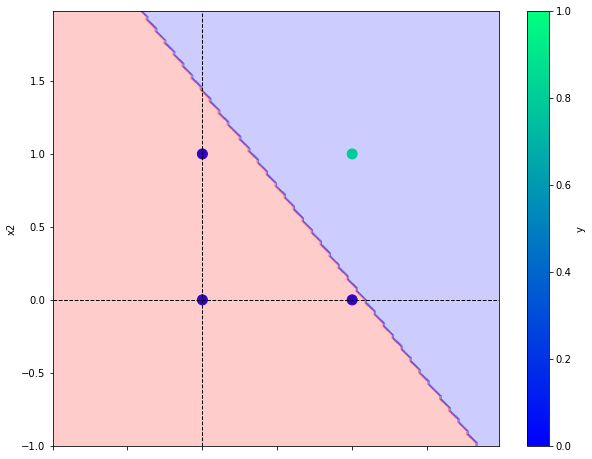

In [293]:
save_plot(dfand, "and.png", model)